In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cobaya
import yaml
# Some packages that has to be installed separately: pyDOE, emcee, tqdm, george
from cobaya.likelihoods.desy1xplanck import desy3xplanck_cosmic_shear_emu

# Evaluating 6x2pt Data Vector Using Emulator

This notebook calls the DES Y3 x Planck PR4 $6\times2$pt emulator to evaluate model vector.

## 1. Environment Setting

This notebook requires a special notebook kernel to fully activate the `cocoa` environment. Note that cocoa has two layers of virtual environments: 

- `GLOBAL`: the global python environment is in `${CONDA_PREFIX}`, where many global python packages and library files are installed.

- `LOCAL`: the local python environment is in `${ROOTDIR}/.local`, where the detailed cobaya and cocoa project settings are recorded. 

The standard notebook kernel initialization will only activate the global environment, but not the local one. To activate the local environment in a notebook, one has to configure the kernel as below:
- 1. Find the jupyter kernel configuration directory by `jupyter kernelspec list`, an example output
    > cocoatorch    /home/u17/jiachuanxu/.local/share/jupyter/kernels/cocoatorch
- 2. Enter the kernel configuration directory, **edit the** `kernel.json` **file**. The default content would be
```json
{"argv": [
        "python",
        "-m",
        "ipykernel_launcher",
        "-f",
        "{connection_file}"
        ],
    "display_name": "Python 3 (ipykernel)",
    "language": "python",
    "metadata": {"debugger": true}}
```
We need to edit the `argv` section as below to **(1)** activate the `cocoa` global env **(2)** enter the `cocoa` root directory **(3)** activate the `cocoa` local env :
```json
"argv": [
    "bash",
    "-c",
    "conda activate cocoatorch ; cd /home/u17/jiachuanxu/cocoa/Cocoa ; source start_cocoa ; /groups/timeifler/jiachuanxu/python_envs/envs/cocoatorch/bin/python -m ipykernel_launcher -f {connection_file}"
],
```

Then one should be able to run this notebook in the full `cocoa` environment. 

## 2. Emulator Object

To initialize the emulator object, one need to provide some basic information about the data file, directory, training configuration file of the emulator. The default information, e.g., can be found [here](https://github.com/CosmoLike/cocoa_desy1xplanck/blob/emuResTRF/emulator_deprecated/likelihood/desy3xplanck_2x2pt_emu.yaml). When initializing the emulator object, an info dict has to be passed to overwrite some of the options in the default version. The importants ones are:
- `data_file`: a file that records essential datasets needed in the posterior evaluation, including data vector, mask, covariance, baryonic feedback PCs, etc.
- `train_config`: a yaml file describing the training details of the emulator. The emulator object need some information in this config file for proper initialization. 

## 3. Data Vector Evaluation

Once initialized, the data vector can be evaluated easily by caling `emulator_object.get_model_vector_emu(**params_values)`. The emulator accepts parameters below (must be fully spell out)
- cosmological parameters: (`As_1e9`, `ns`, `H0`, `omegab`, `omegam`, `mnu`)
- source sample photo-z bias: (`DES_DZ_S1-4`)
- source sample shear calibration bias: (`DES_M1-4`)
- source sample intrinsic alignment (NLA with power-law redshift evolution): (`DES_A1_1`, `DES_A1_2`)
- lens sample photo-z bias: (`DES_DZ_L1-6`)
- lens sample photo-z stretch: (`DES_STRETCH_L1-6`)
- lens sample linear galaxy bias (the emulator is trained on linear bias): (`DES_B1_1-6`)
- baryonic feedback PCs: (`DES_BARYON_Q1-2`)

The `sigma_8` as a derived parameter can be evaluated as `emulator_object.get_sigma8_emu(**params_values)`

## 4. Data Vector Convention

The emulator is trained on DES Y3 $\times$ Planck PR4 real-space $6\times2$pt experiment. Some quick facts about the data vector:
- 4 source sample tomography bins (abbrev. as S$i$ below); 6 lens sample tomograpy bins (abbrev. as L$i$ below)
- The $5\times2$pt is in real space: 30 logarithmic $\vartheta$ bins, from 0.25 to 250 arcmin
- The CMB lensing bandpower is in Fourier band power with 9 bands.
- Probe blocking: 
    - $\xi_+(\vartheta)$: [0, 300), tomography bin pairs are aligned as (S1,S1), (S1,S2), (S1,S3), (S1,S4), (S2,S2), (S2,S3), ...
    - $\xi_-(\vartheta)$: [300, 600), tomography bin pairs are aligned as (L1,S1), (L1,S2), (L1,S3), (L1,S4), (L2,S1), ...
    - $\gamma_t(\vartheta)$: [600, 1320)
    - $w_{gg}(\vartheta)$: [1320, 1500)
    - $w_{g\kappa}(\vartheta)$: [1500, 1680)
    - $w_{s\kappa}(\vartheta)$: [1680, 1800)
    - $C_{L_b}^{\kappa\kappa}$: [1800, 1809)

In [17]:
### Initialize the likelihood object
info = {
    # data_file path is relative to `Cocoa/project/desy1xplanck/data`
    "data_file": "datasets/Y3xPlanckPR4_emu_dmo_mask0_v2_HF.dataset",
    "path": "./external_modules/data/desy1xplanck",
    # train_config path is relative to `Cocoa`
    "train_config": "./projects/desy1xplanck/emulator_deprecated/train_emu_full_resnet.yaml",
    # keep other options as default
}
emu = desy3xplanck_cosmic_shear_emu.desy3xplanck_cosmic_shear_emu(info = info)

default data type = double
Only 12/24 params are trained on.
Using Evan's simplified ResNet model...
Learning rate = 0.001
Weight decay = 0.001
Reduce LR on plateau:  True
default data type = double
Only 24/24 params are trained on.
Using Evan's simplified ResNet model...
Learning rate = 0.001
Weight decay = 0.001
Reduce LR on plateau:  True
default data type = double
Only 18/24 params are trained on.
Using Evan's simplified ResNet model...
Learning rate = 0.001
Weight decay = 0.001
Reduce LR on plateau:  True
default data type = double
Only 18/24 params are trained on.
Using Evan's simplified ResNet model...
Learning rate = 0.001
Weight decay = 0.001
Reduce LR on plateau:  True
default data type = double
Only 12/24 params are trained on.
Using Evan's simplified ResNet model...
Learning rate = 0.001
Weight decay = 0.001
Reduce LR on plateau:  True
default data type = double
Only 6/24 params are trained on.
Using Evan's simplified ResNet model...
Learning rate = 0.001
Weight decay = 0.0

In [18]:
params_yaml = '''### Parameters of an example evaluation
As_1e9: 2.1
ns: 0.96605
H0: 67.32
omegab: 0.04
omegam: 0.3
mnu: 0.06
DES_DZ_S1: 0.0
DES_DZ_S2: 0.0
DES_DZ_S3: 0.0
DES_DZ_S4: 0.0
DES_M1: -0.0063
DES_M2: -0.0198
DES_M3: -0.0241
DES_M4: -0.0369
DES_A1_1: -0.7
DES_A1_2: -1.7
DES_DZ_L1: -0.009
DES_DZ_L2: -0.035
DES_DZ_L3: -0.005
DES_DZ_L4: -0.007
DES_DZ_L5: 0.002
DES_DZ_L6: 0.002
DES_B1_1: 1.5
DES_B1_2: 1.8
DES_B1_3: 1.8
DES_B1_4: 1.9
DES_B1_5: 2.3
DES_B1_6: 2.3
DES_STRETCH_L1: 0.975
DES_STRETCH_L2: 1.306
DES_STRETCH_L3: 0.870
DES_STRETCH_L4: 0.918
DES_STRETCH_L5: 1.080
DES_STRETCH_L6: 0.845
DES_BARYON_Q1: 0.0
DES_BARYON_Q2: 0.0
'''
params_values = yaml.safe_load(params_yaml)
model_vector = emu.get_model_vector_emu(**params_values)
sigma_8 = emu.get_sigma8_emu(**params_values)

In [21]:
print(f'Emulated sigma_8 = {sigma_8[0]:.4f}')

Emulated sigma_8 = 0.8299


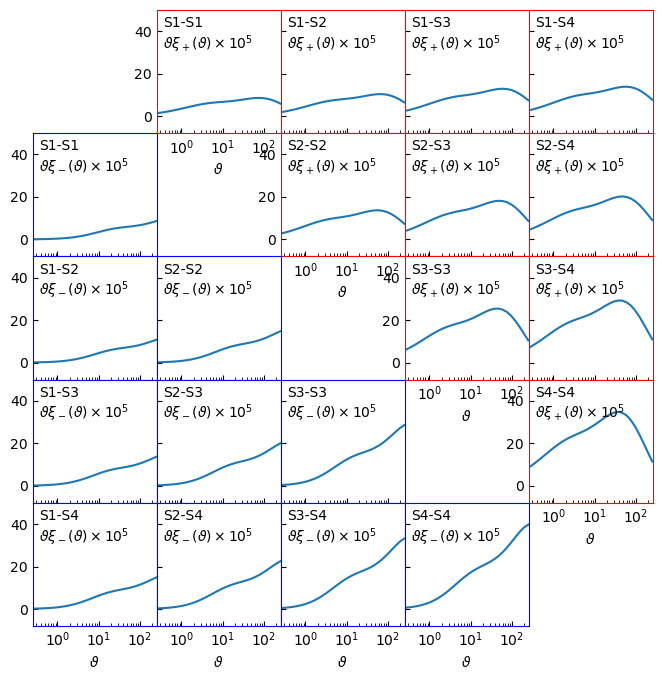

In [30]:
### show the data vector (cosmic shear only)
fix, axes = plt.subplots(5,5, figsize=(8,8))
thetas = np.logspace(np.log10(0.25), np.log10(250), 30)

ct = 0

for i in range(4):
    for j in range(i,4):
        sign = 1e5
        
        ### xi_p
        ax = axes[i,j+1]
        ax.spines['right'].set_color('red');ax.spines['left'].set_color('red');
        ax.spines['bottom'].set_color('red');ax.spines['top'].set_color('red');
        ax.text(0.05, 0.95, "S%d-S%d\n"%(i+1,j+1)+r'$\vartheta\xi_+(\vartheta)\times 10^{5}$', 
                transform=ax.transAxes, va='top', ha='left')
        
        data = model_vector[ct*30:(ct+1)*30]
        mask = ~np.isclose(data, np.zeros(30))
        ax.semilogx(thetas[mask] , (sign*data*thetas)[mask], ls='-')
        
        ax.set(xlim=[0.25, 255], ylim=[-8,50])
        if j>i:
            ax.set(yticklabels=[], xticklabels=[])
        else:
            ax.set(xlabel=r'$\vartheta$')
        ax.tick_params(which='both', axis='both', direction='in')

        ### xi_m
        ax = axes[j+1, i]
        ax.spines['right'].set_color('blue');ax.spines['left'].set_color('blue');
        ax.spines['bottom'].set_color('blue');ax.spines['top'].set_color('blue');
        ax.text(0.05, 0.95, "S%d-S%d\n"%(i+1,j+1)+r'$\vartheta\xi_-(\vartheta)\times 10^{5}$', 
                transform=ax.transAxes, va='top', ha='left')
        
        data = model_vector[ct*30+300:(ct+1)*30+300]
        mask = ~np.isclose(data, np.zeros(30))
        
        ax.semilogx(thetas[mask], (sign*data*thetas)[mask], ls='-')
        
        ax.set(xlim=[0.25, 255], ylim=[-8,50])
        if i>0:
            ax.set(yticklabels=[])
        if j==3:
            ax.set(xlabel=r'$\vartheta$')
        else:
            ax.set(xticklabels=[])
        ax.tick_params(which='both', axis='both', direction='in')
        
        ct += 1
for i in range(5):
    ax = axes[i,i]
    ax.axis('off')
plt.subplots_adjust(wspace=0, hspace=0)